# <img src="https://filoger.com/wp-content/uploads/2021/09/circle-logo-1536x1536.png" alt="keras" width="150" height="150">
<h1 align=center><font size = 7>Lab 05 : Polynomial Regression</font></h1>
<h1 align=center><font size = 4>Hands-On Machine Learning, 1401 | DeadLine: 3rd Aban, 13:00 </font></h1>



# Step0: Import Libraries

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [242]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# Step1: Read Data

In [243]:
df = pd.read_csv("Real estate.csv")

# Step2: Data Overview

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


# Step3: X, y

In [245]:
df.rename(columns = {'Y house price of unit area':'price'}, inplace = True)

<AxesSubplot:xlabel='X5 latitude', ylabel='X6 longitude'>

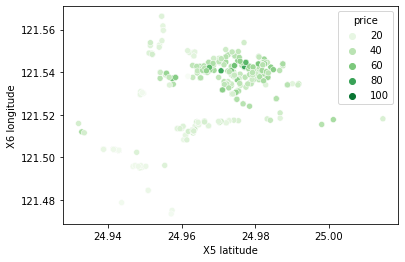

In [246]:
sns.scatterplot(data=df, x='X5 latitude', y='X6 longitude', hue='price', palette='Greens')

In [247]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,price
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<AxesSubplot:>

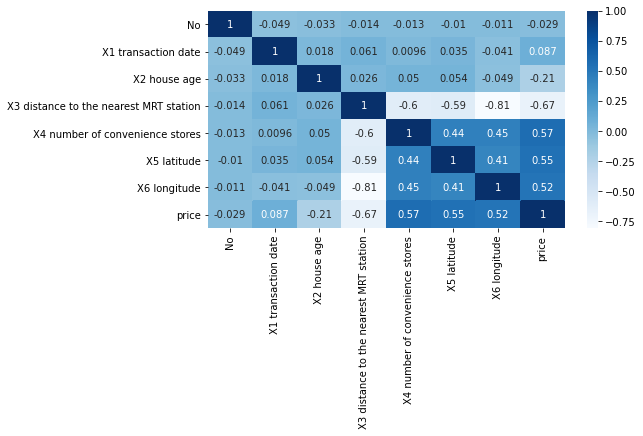

In [248]:
# correlation
fig = plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True,cmap='Blues')

In [291]:
X = df.drop(['price', 'No'], axis=1)
y=df['price']
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [292]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: price, Length: 414, dtype: float64

# Step4: Linear Regression

In [293]:
from sklearn.model_selection import train_test_split

### train_test_split

In [294]:
XL_train, XL_test, yL_train, yL_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Creat the Model

In [295]:
LR = LinearRegression()

### Train the Model

In [296]:
LR.fit(XL_train, yL_train)

LinearRegression()

### Print Coefficient and Intercept 

In [297]:
coef_m = pd.DataFrame(data=LR.coef_, index=X.columns, columns=['Coefficient'])
coef_m

,Coefficient
X1 transaction date,4.973004
X2 house age,-0.286733
X3 distance to the nearest MRT station,-0.004399
X4 number of convenience stores,1.232185
X5 latitude,243.562821
X6 longitude,1.518267


In [298]:
LR.intercept_

-16234.447509381325

###  Prediction & Evaluation

In [299]:
yL_pred = LR.predict(XL_test)

In [300]:
pd.DataFrame({'y_test_LR':yL_test, 'y_pred_LR':yL_pred, "Error_LR":(yL_test - yL_pred)})

,y_test_LR,y_pred_LR,Error_LR
176,19.2,12.304507,6.895493
347,11.2,9.884906,1.315094
307,24.7,21.460539,3.239461
299,46.1,48.470683,-2.370683
391,31.3,31.851676,-0.551676
...,...,...,...
65,44.3,43.943787,0.356213
48,13.4,11.670116,1.729884
18,42.3,47.367277,-5.067277
15,50.5,38.112267,12.387733


### Creat a DataFrame
<hr>
<b>MAE, MSE, RMSE</b>

In [301]:
MAE_L = metrics.mean_absolute_error(yL_test, yL_pred)
MSE_L = metrics.mean_squared_error(yL_test, yL_pred)
RMSE_L = np.sqrt(MSE_L)

In [332]:
Error_L = pd.DataFrame([MAE_L, MSE_L, RMSE_L], index=['MAE', 'MSE', 'RMSE'], columns=['Error_LR'])
Error_L

,Error_LR
MAE,5.195031
MSE,44.129008
RMSE,6.642967


# Step5: PolynomialFeatures

In [333]:
polynomial = PolynomialFeatures(degree=2, include_bias=True)
poly_X = polynomial.fit_transform(X)

In [334]:
poly_X.shape , X.shape

((414, 28), (414, 6))

# Step6: train_test_split

In [335]:
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.2, random_state=101)

# Step7: Polynomial Regression

### Creat the Model

In [336]:
polymodel = LinearRegression()

###  Train the Model

In [337]:
polymodel.fit(X_train, y_train)

LinearRegression()

### Print Coefficient and Intercept

In [338]:
polymodel.coef_ 

array([ 7.26622059e+00, -1.16112083e+04, -2.41789304e+01,  2.08268352e+01,
        5.15720032e+03,  5.40069802e+05,  1.50788927e+06,  6.59770744e+00,
        8.14238388e-02, -3.47685913e-03, -6.97130318e-01, -4.86065756e+01,
       -1.12957595e+02,  1.98664401e-02,  7.12317600e-05,  1.41707768e-02,
       -7.47035125e+00,  3.75353793e-01, -1.65586862e-07, -1.06663461e-03,
       -2.88299213e-01, -5.45813895e-02,  3.75546535e-02, -1.25392468e+02,
       -5.11629049e+00,  3.38236555e+03, -5.01851995e+03, -4.75200446e+03])

In [339]:
polymodel.intercept_

-86718586.21077575

###  Prediction & Evaluation

In [340]:
y_pred = polymodel.predict(X_test)

In [341]:
pd.DataFrame({'y_test_Polynomial':y_test, 'y_pred_Polynomial':y_pred, "Error_Polynomial":(y_test - y_pred)})

,y_test_Polynomial,y_pred_Polynomial,Error_Polynomial
176,19.2,16.450025,2.749975
347,11.2,4.833575,6.366425
307,24.7,20.361103,4.338897
299,46.1,46.203381,-0.103381
391,31.3,28.758183,2.541817
...,...,...,...
65,44.3,50.258696,-5.958696
48,13.4,18.916831,-5.516831
18,42.3,45.718028,-3.418028
15,50.5,46.065933,4.434067


### Creat a DataFrame
<hr>
<b>MAE, MSE, RMSE</b>

In [342]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [343]:
Error_Poly = pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Error_Poly'])
Error_Poly

,Error_Poly
MAE,4.181807
MSE,28.002315
RMSE,5.291721


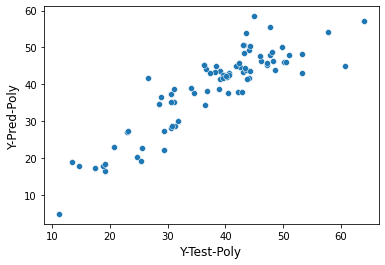

In [344]:
test_residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test-Poly', fontsize=12)
plt.ylabel('Y-Pred-Poly', fontsize=12)
plt.show()

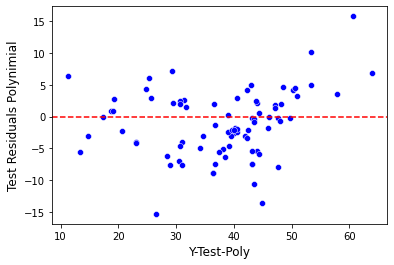

In [345]:
sns.scatterplot(x=y_test, y=test_residuals , color='b')
plt.axhline(y=0, color='r', ls='--')
plt.xlabel('Y-Test-Poly', fontsize=12)
plt.ylabel('Test Residuals Polynimial', fontsize=12)
plt.show()

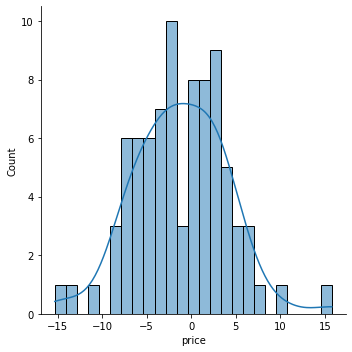

In [346]:
sns.displot(test_residuals, bins=25, kde=True)

# Step8: Concat DataFrame in Step4 and Step7

In [347]:
pd.concat([Error_L, Error_Poly], axis=1)

,Error_LR,Error_Poly
MAE,5.195031,4.181807
MSE,44.129008,28.002315
RMSE,6.642967,5.291721


# Step9: Choose Degree
<hr>
Plot RMSE Train and RMSE Test for different degrees

In [348]:
train_RMSE_list = []

test_RMSE_list =[]
for d in range(1,10):
    
    #Feature
    polyFeture = PolynomialFeatures(degree=d, include_bias=True)
    poly_x = polyFeture.fit_transform(X)
    
    #split train test
    X_train, X_test, y_train, y_test = train_test_split(poly_x, y,
                                                       test_size=0.3,
                                                       random_state=101)
    #creat model
    PolyModel = LinearRegression()
    
    #train
    PolyModel.fit(X_train, y_train)
    
    #predict
    y_train_pred = PolyModel.predict(X_train)
    y_test_pred = PolyModel.predict(X_test)
    
    #RMSE
    train_RMSE = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    test_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    
    train_RMSE_list.append(train_RMSE)
    
    test_RMSE_list.append(test_RMSE)

In [349]:
train_RMSE_list

[9.543254404458269,
 8.160754051920613,
 7.287474787855259,
 6.394571059314882,
 6.983667101283596,
 7.258139654637366,
 5.3540492008206515,
 5.029426171516172,
 6.061559222412844]

In [350]:
test_RMSE_list

[6.79792599510682,
 5.386880736890806,
 10.606140131845724,
 89.17087251326936,
 830.8102701695084,
 1704.148143098659,
 40459.44174437912,
 18877.93066623942,
 137765.0370249122]

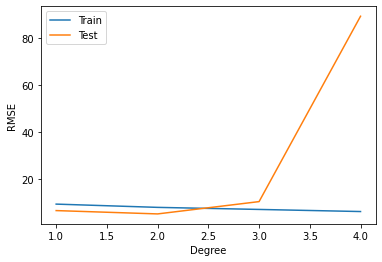

In [351]:
plt.plot(range(1,5), train_RMSE_list[:4], label='Train')
plt.plot(range(1,5), test_RMSE_list[:4], label='Test')

plt.xlabel('Degree')

plt.ylabel('RMSE')

plt.legend()

<div class="alert alert-success" role="alert">
  <h1 class="alert-heading">Well done!</h1>
  <p>Best Wishes!, Filoger</p>
</div>